Dataset: `mpg` from `seaborn`

Is there a difference between the average mileage of American and European cars? 

In [1]:
import pandas as pd
import seaborn as sns

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [3]:
usa = mpg.query('origin == "usa"')
usa.shape

(249, 9)

In [4]:
europe = mpg.query('origin =="europe"')
europe.shape

(70, 9)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

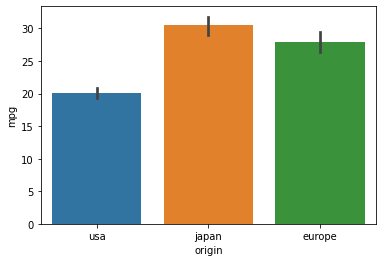

In [6]:
# Make sure to do descriptive statistics first!
sns.barplot(x='origin', y='mpg', data=mpg)

In [8]:
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [5]:
from scipy import stats
stats.ttest_ind(europe['mpg'], usa['mpg'])

Ttest_indResult(statistic=8.914687150324422, pvalue=3.94517347398542e-17)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

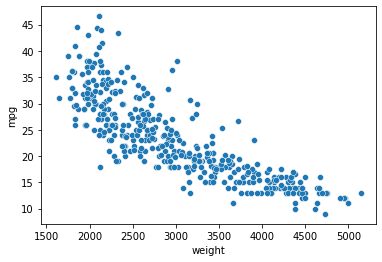

In [10]:
# What about weight and mpg?
sns.scatterplot(x='weight', y='mpg', data=mpg)